In [23]:
import os
import pandas as pd
from pathlib import Path
from tqdm import tqdm
from scipy.spatial import cKDTree
from scipy.spatial.distance import cdist
import time
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))
import sys
sys.path.append(r'C:\Users\tacuevas\Documents\GitHub\concorde\modules')
from mda import normalize_df, unnormalize_df
plt.style.use('seaborn-darkgrid')
plt.rcParams.update({'font.size': 14})
from matplotlib.offsetbox import AnchoredText
from sklearn.decomposition import PCA
import random
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
%%javascript
IPython.notebook.kernel.execute('nb_name = "' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [3]:
df = pd.read_pickle(r'..\data\STORM\processed\STORM_NA_R2_In_pnt_v3.pkl')
df.index = range(len(df))
df.head()

,year,month,yr_tc_number,time_step_at_min_press,time_step_at_min_distNC,lat_at_min_press,lon_at_min_press,lat_at_min_distNC,lon_at_min_distNC,min_press_at_min_distNC,...,distNC_at_min_distNC,distNC_at_min_press,trajectory_at_min_distNC,trajectory_at_min_press,mean_trajectory,curvature,duration,lat_gen,lon_gen,length
0,1.0,9.0,1.0,42.0,61.0,29.2,-61.6,37.7,-74.3,980.8,...,356.605835,1577.689303,304.992020,284.036243,299.236350,0.000000e+00,67.0,14.7,-32.3,5644.897592
1,3.0,9.0,1.0,16.0,72.0,16.1,-49.4,34.8,-79.4,1000.5,...,241.454272,3449.683632,336.801409,296.565051,296.668103,0.000000e+00,72.0,11.7,-34.3,5914.717493
2,4.0,9.0,2.0,2.0,4.0,31.1,-79.1,32.9,-78.6,1000.2,...,304.465776,502.759704,16.699244,14.036243,13.255269,0.000000e+00,4.0,29.5,-79.4,385.345500
3,6.0,9.0,10.0,34.0,50.0,22.6,-75.9,35.3,-78.7,962.3,...,173.271193,1399.274953,355.236358,326.309932,317.211591,5.737717e-14,53.0,13.4,-58.8,4107.373112
4,12.0,8.0,0.0,33.0,71.0,16.8,-63.1,32.5,-74.8,968.5,...,352.042571,2451.055090,66.801409,296.565051,348.623683,5.711346e-14,105.0,12.4,-45.1,10202.362688


##### All parameters (24)

In [4]:
df.index = df.tc_id
dfs = df.drop(['year', 'month', 'yr_tc_number', 'tc_id', 'max_cat'], axis = 1)
dfs = dfs.fillna(0)

In [6]:
index = [0 if 'trajectory' in s else 1 for s in dfs.columns]

In [7]:
norm = normalize_df(dfs, index)

In [8]:
norm2 = normalize_df(dfs.iloc[:, random.sample(range(len(dfs.columns)), len(dfs.columns))], index = index)
norm3 = normalize_df(dfs.iloc[:, random.sample(range(len(dfs.columns)), len(dfs.columns))], index = index)
norm4 = normalize_df(dfs.iloc[:, random.sample(range(len(dfs.columns)), len(dfs.columns))], index = index)

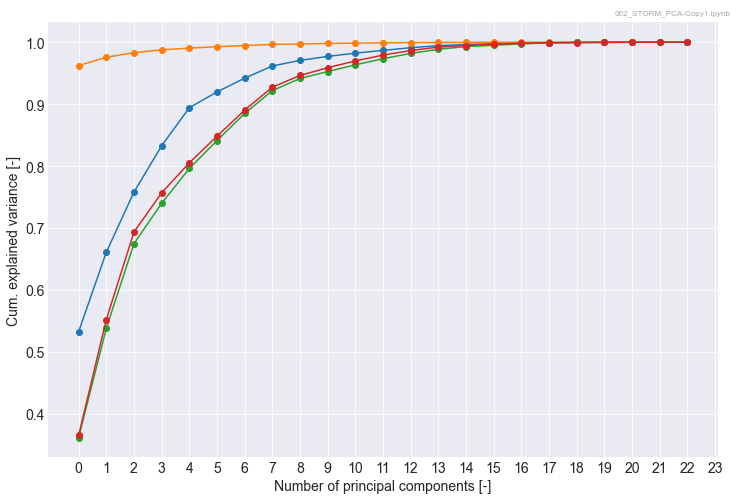

In [9]:
pca = PCA().fit(norm.values)
pca2 = PCA().fit(norm2.values)
pca3 = PCA().fit(norm3.values)
pca4 = PCA().fit(norm4.values)


fig, ax = plt.subplots(figsize = (12, 8))
ax.plot(pca.explained_variance_ratio_.cumsum(), 'o-')
ax.plot(pca2.explained_variance_ratio_.cumsum(), 'o-')
ax.plot(pca3.explained_variance_ratio_.cumsum(), 'o-')
ax.plot(pca4.explained_variance_ratio_.cumsum(), 'o-')
ax.set_xticks(np.arange(0, len(dfs.columns) + 1, 1))
ax.set_ylabel('Cum. explained variance [-]')
ax.set_xlabel('Number of principal components [-]')

text = AnchoredText(nb_name, 'upper right',frameon = False, borderpad = -2, prop=dict(fontsize = 'xx-small', alpha = 0.4))
ax.add_artist(text)

In [11]:
pca = PCA(n_components = 0.97).fit(norm.values)

In [16]:
pca_sum = pd.DataFrame(index = range(len(pca.components_)), columns = norm.columns)
for index, component in enumerate(np.round(pca.components_, 3)):
    res = []
    for value, col_name in zip(component, norm.columns):
        pca_sum.loc[index, col_name] = value

In [24]:
pca_sum.astype(float)

,time_step_at_min_press,time_step_at_min_distNC,lat_at_min_press,lon_at_min_press,lat_at_min_distNC,lon_at_min_distNC,min_press_at_min_distNC,min_press_at_min_press,max_ws_at_min_distNC,max_ws_at_min_press,rad_to_max_ws_at_min_distNC,rad_to_max_ws_at_min_press,landfall,distNC_at_min_distNC,distNC_at_min_press,trajectory_at_min_distNC,trajectory_at_min_press,mean_trajectory,curvature,duration,lat_gen,lon_gen,length
0,-0.023,-0.035,0.036,-0.019,-0.016,0.063,0.029,0.053,-0.031,-0.055,-0.001,0.005,-0.104,-0.000,-0.036,-0.576,-0.576,-0.541,-0.053,-0.028,0.075,-0.084,-0.028
1,-0.089,-0.107,0.071,-0.025,-0.031,-0.033,0.110,0.208,-0.119,-0.214,0.004,0.027,-0.162,0.043,-0.077,0.735,-0.215,-0.379,-0.080,-0.121,0.200,-0.136,-0.120
2,-0.103,-0.107,0.040,-0.039,-0.078,0.030,0.210,0.253,-0.231,-0.265,0.014,0.028,-0.572,0.116,-0.080,-0.310,0.390,0.197,-0.037,-0.128,0.204,-0.145,-0.144
3,0.017,0.027,-0.026,0.027,-0.006,0.018,-0.045,-0.061,0.050,0.063,-0.004,-0.009,0.077,0.006,0.052,-0.052,0.671,-0.713,-0.058,0.042,-0.054,0.055,0.060
4,0.100,0.141,-0.128,0.105,-0.077,0.228,-0.076,-0.213,0.074,0.215,0.005,-0.037,-0.687,0.241,0.177,0.159,-0.123,-0.060,0.046,0.154,-0.253,0.252,0.147
5,-0.002,0.027,-0.114,-0.018,-0.408,-0.402,0.150,-0.003,-0.175,-0.008,0.017,0.003,0.227,0.724,0.119,-0.036,-0.040,-0.009,-0.010,0.024,-0.105,-0.015,0.024
6,-0.014,0.134,-0.247,0.158,0.115,-0.230,0.429,0.087,-0.470,-0.113,0.050,0.007,0.008,-0.403,0.349,0.001,-0.046,-0.044,0.039,0.092,-0.220,0.223,0.070
7,-0.038,-0.006,0.014,0.146,0.260,0.727,0.162,0.164,-0.161,-0.169,0.005,0.030,0.302,0.364,0.170,0.002,0.003,0.033,0.000,0.021,0.032,0.115,0.065
8,0.008,-0.010,0.032,-0.027,-0.039,0.014,0.017,0.032,-0.016,-0.027,0.006,0.026,0.003,0.010,-0.051,0.008,0.014,-0.089,0.989,-0.009,0.038,-0.041,-0.024


###### Subset of the parameters

In [27]:
df = pd.read_pickle(r'..\data\STORM\processed\STORM_NA_R2_In_pnt_v3.pkl')
df.index = df.tc_id
dfs = df.drop(['year', 'yr_tc_number', 'tc_id', 'max_cat', 'time_step_at_min_press', 'time_step_at_min_distNC',
             'lat_at_min_press', 'lon_at_min_press', 'lat_at_min_distNC', 'lon_at_min_distNC', 'trajectory_at_min_press', 'mean_trajectory',
             'curvature', 'distNC_at_min_press'], axis = 1)
dfs = dfs.fillna(0)

In [28]:
index = [0 if 'trajectory' in s else 1 for s in dfs.columns]

In [29]:
norm = normalize_df(dfs, index)
norm2 = normalize_df(dfs.iloc[:, random.sample(range(len(dfs.columns)), len(dfs.columns))], index = index)
norm3 = normalize_df(dfs.iloc[:, random.sample(range(len(dfs.columns)), len(dfs.columns))], index = index)
norm4 = normalize_df(dfs.iloc[:, random.sample(range(len(dfs.columns)), len(dfs.columns))], index = index)

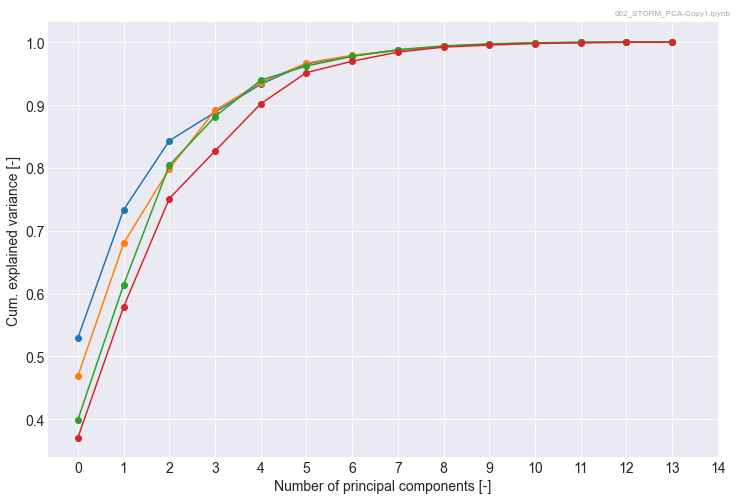

In [30]:
pca = PCA().fit(norm.values)
pca2 = PCA().fit(norm2.values)
pca3 = PCA().fit(norm3.values)
pca4 = PCA().fit(norm4.values)


fig, ax = plt.subplots(figsize = (12, 8))
ax.plot(pca.explained_variance_ratio_.cumsum(), 'o-')
ax.plot(pca2.explained_variance_ratio_.cumsum(), 'o-')
ax.plot(pca3.explained_variance_ratio_.cumsum(), 'o-')
ax.plot(pca4.explained_variance_ratio_.cumsum(), 'o-')
ax.set_xticks(np.arange(0, len(dfs.columns) + 1, 1))
ax.set_ylabel('Cum. explained variance [-]')
ax.set_xlabel('Number of principal components [-]')

text = AnchoredText(nb_name, 'upper right',frameon = False, borderpad = -2, prop=dict(fontsize = 'xx-small', alpha = 0.4))
ax.add_artist(text)

In [31]:
pca = PCA(n_components = 0.97).fit(norm.values)

In [33]:
pca_sum = pd.DataFrame(index = range(len(pca.components_)), columns = norm.columns)
for index, component in enumerate(np.round(pca.components_, 3)):
    res = []
    for value, col_name in zip(component, norm.columns):
        pca_sum.loc[index, col_name] = value

In [34]:
pca_sum

,month,min_press_at_min_distNC,min_press_at_min_press,max_ws_at_min_distNC,max_ws_at_min_press,rad_to_max_ws_at_min_distNC,rad_to_max_ws_at_min_press,landfall,distNC_at_min_distNC,trajectory_at_min_distNC,duration,lat_gen,lon_gen,length
0,0.004,0.04,0.05,-0.043,-0.053,-0.001,0.003,-0.155,-0.001,-0.976,-0.024,0.072,-0.092,-0.027
1,0.007,-0.249,-0.346,0.272,0.361,-0.015,-0.04,0.592,-0.117,-0.206,0.181,-0.301,0.212,0.195
2,-0.005,-0.112,-0.271,0.111,0.275,0.004,-0.045,-0.733,0.244,0.02,0.172,-0.302,0.283,0.164
3,-0.954,0.117,0.04,-0.165,-0.061,0.015,0.007,0.039,-0.042,-0.017,0.059,-0.111,0.142,0.061
4,0.008,0.095,0.028,-0.108,-0.032,0.006,0.01,0.278,0.947,-0.035,0.009,-0.032,-0.015,0.03
5,-0.289,-0.525,-0.035,0.56,0.053,-0.055,0.001,-0.091,0.162,0.028,-0.151,0.355,-0.342,-0.141
6,-0.072,0.27,-0.485,-0.309,0.503,-0.012,-0.203,-0.013,-0.019,0.036,-0.04,0.146,-0.48,-0.205
